# Objectives

1. Calculate Projected Regular Season Win/Loss
2. Calculate Projected Postseason Result
3. Project Points Against Unluckiness
4. Find out individual team volatility 

### Import Libraries

In [274]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Import Data

In [488]:
data_2014 = pd.read_excel('C:/Users/mikes/Documents/Python Scripts/FF_owners/ATOAFFL_STATS_2014_2017.xlsx', sheetname='2014')
data_2014.name = '2014'
data_2015 = pd.read_excel('C:/Users/mikes/Documents/Python Scripts/FF_owners/ATOAFFL_STATS_2014_2017.xlsx', sheetname='2015')
data_2015.name = '2015'
data_2016 = pd.read_excel('C:/Users/mikes/Documents/Python Scripts/FF_owners/ATOAFFL_STATS_2014_2017.xlsx', sheetname='2016')
data_2016.name = '2016'
data_2017 = pd.read_excel('C:/Users/mikes/Documents/Python Scripts/FF_owners/ATOAFFL_STATS_2014_2017.xlsx', sheetname='2017')
data_2017.name = '2017'

### Clean dataframes

In [489]:
for df in [data_2014, data_2015, data_2016, data_2017]:
    #Calculate Regular Season Win PCT
    df.insert(1, 'Win_Pct', df['WINS'] / 13)
    
    #df.drop(['WINS', 'LOSSES', 'PF/G', 'PA/G', 'DIFF', 'REGULAR SEASON FINISH', 'RESULT', 'MANAGER'], axis=1, inplace=True)
    
    pts_for_avg = df['POINTS FOR'].mean()
    df['Pts_For_Above_Avg'] = df['POINTS FOR'] - pts_for_avg
    #df['Year'] = df.name

### Combining Dataframes

In [490]:
data = data_2014.append([data_2015, data_2016, data_2017])

In [491]:
data.sort_values('Win_Pct')

,MANAGER,Win_Pct,WINS,LOSSES,POINTS FOR,POINTS AGAINST,PF/G,PA/G,DIFF,REGULAR SEASON FINISH,RESULT,Pts_For_Above_Avg
10,BRENDON/ROB,0.000000,0,13,1231.7,1436.4,94.746154,110.492308,-15.746154,12,MISSED POSTSEASON,-292.658333
3,MATEO,0.153846,2,11,1315.5,1578.8,101.192308,121.446154,-20.253846,12,MISSED POSTSEASON,-197.075000
11,ARMANDO,0.230769,3,10,1444.9,1504.1,111.146154,115.700000,-4.553846,10,MISSED POSTSEASON,-39.116667
10,FERGIE,0.230769,3,10,1225.7,1541.6,94.284615,118.584615,-24.300000,12,MISSED POSTSEASON,-258.316667
3,MATEO,0.230769,3,10,1368.4,1455.6,105.261538,111.969231,-6.707692,11,MISSED POSTSEASON,-88.825000
8,DAVIS,0.230769,3,10,1377.6,1551.2,105.969231,119.323077,-13.353846,11,MISSED POSTSEASON,-106.416667
4,JUSTIN,0.230769,3,10,1336.7,1535.0,102.823077,118.076923,-15.253846,12,MISSED POSTSEASON,-120.525000
3,MATEO,0.307692,4,9,1510.4,1555.3,116.184615,119.638462,-3.453846,11,MISSED POSTSEASON,-13.958333
9,PETER,0.307692,4,9,1295.9,1446.1,99.684615,111.238462,-11.553846,10,MISSED POSTSEASON,-161.325000
7,BRIAN,0.384615,5,8,1556.2,1701.0,119.707692,130.846154,-11.138462,9,MISSED POSTSEASON,43.625000


### Graphic For Regular Season To Post

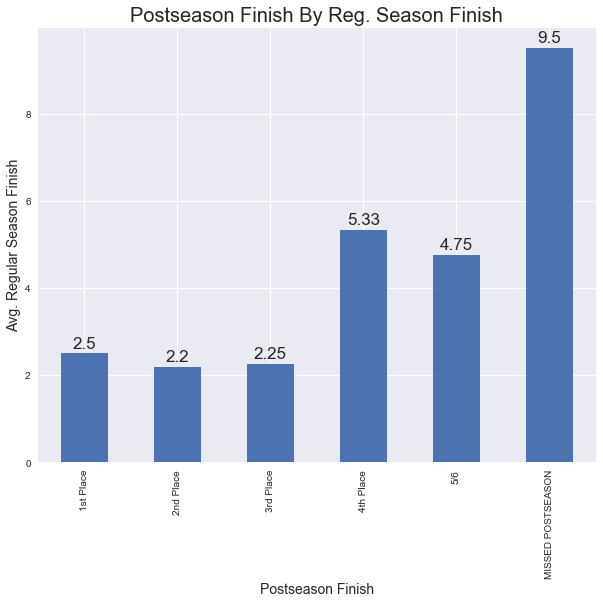

In [310]:
ax = data.groupby('RESULT')['REGULAR SEASON FINISH'].mean().plot(kind='bar', figsize=(10, 8))
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
            (p.get_x()+p.get_width()/2., p.get_height()),
            ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=17)
ax.set_title('Postseason Finish By Reg. Season Finish', fontsize=20)
ax.set_ylabel('Avg. Regular Season Finish', fontsize=14)
ax.set_xlabel('Postseason Finish', fontsize=14);

### Average Win_Pct and Points For

In [365]:
avg_pts_for = np.round((data.groupby('MANAGER')['POINTS FOR'].sum() / data.groupby('MANAGER')['POINTS FOR'].count()), 2)
avg_win_pct = np.round((data.groupby('MANAGER')['Win_Pct'].sum() / data.groupby('MANAGER')['Win_Pct'].count()), 2)

df = pd.concat([avg_pts_for, avg_win_pct], axis=1)

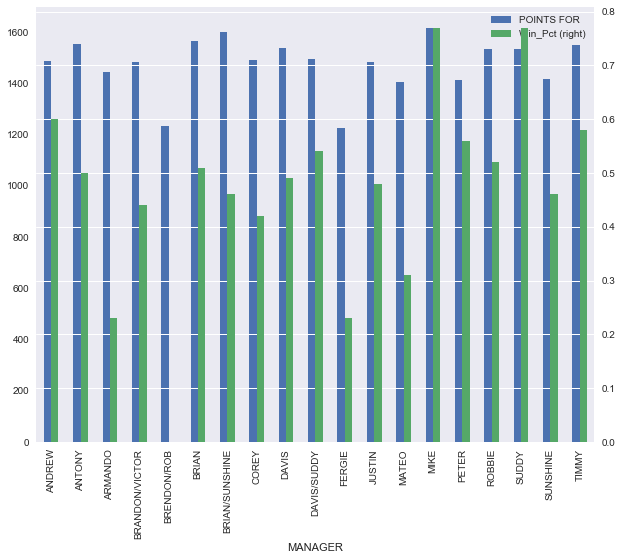

In [383]:
ax = df.plot(kind='bar', secondary_y= 'Win_Pct', figsize=(10, 8))


plt.show()

### Total Wins

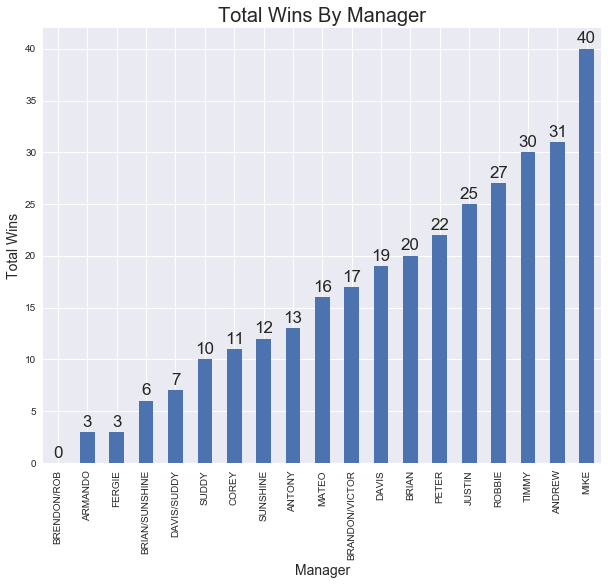

In [404]:
ax = data.groupby('MANAGER')['WINS'].sum().sort_values().plot(kind='bar', figsize=(10,8))
for p in ax.patches:
    ax.annotate((int(p.get_height())), 
            (p.get_x()+p.get_width()/2., p.get_height()),
            ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=17)
ax.set_title('Total Wins By Manager', fontsize=20)
ax.set_ylabel('Total Wins', fontsize=14)
ax.set_xlabel('Manager', fontsize=14);

### Win-Loss and Win_Pct

In [446]:
win_loss = data.groupby('MANAGER')['WINS', 'LOSSES'].sum()
table = win_loss.join(avg_win_pct).sort_values('Win_Pct', ascending=False)

In [447]:
rings = (data[data['RESULT']=='1st Place'].groupby('MANAGER')['RESULT'].count())

In [458]:
table['Rings'] = rings
table['Rings'].fillna(0, inplace=True)
table['Rings'] = table['Rings'].astype(int)

In [461]:
postseasons = (data[~data['RESULT'].isin(['MISSED POSTSEASON'])].groupby('MANAGER')['RESULT'].count())

In [465]:
table['Postseasons'] = postseasons
table['Postseasons'].fillna(0, inplace=True)
table['Postseasons'] = table['Postseasons'].astype(int)

In [471]:
table.sort_values(['Postseasons', 'Rings'], ascending=False)

,WINS,LOSSES,Win_Pct,Rings,Postseasons
MANAGER,,,,,
MIKE,40,12,0.77,2,4
TIMMY,30,22,0.58,1,4
JUSTIN,25,27,0.48,1,3
ANDREW,31,21,0.60,0,2
ROBBIE,27,25,0.52,0,2
DAVIS,19,20,0.49,0,2
SUDDY,10,3,0.77,0,1
PETER,22,17,0.56,0,1
DAVIS/SUDDY,7,6,0.54,0,1


### Avg. Wins Per Year By Manager

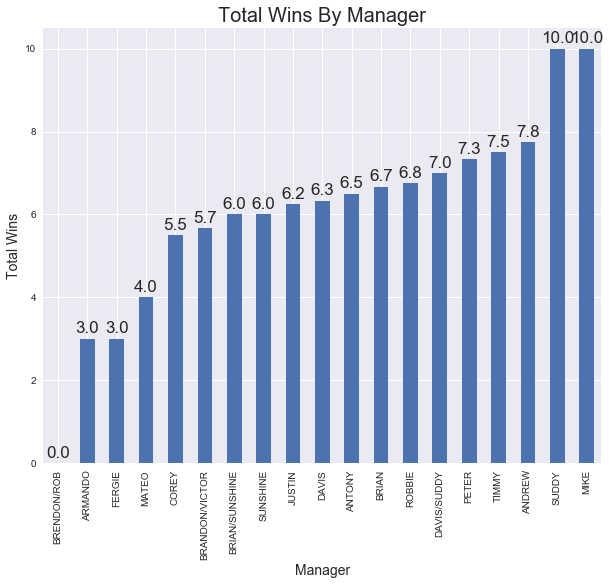

In [409]:
ax = data.groupby('MANAGER')['WINS'].mean().sort_values().plot(kind='bar', figsize=(10,8))

for p in ax.patches:
    ax.annotate((np.round(p.get_height(), 1)), 
            (p.get_x()+p.get_width()/2., p.get_height()),
            ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=17)
ax.set_title('Total Wins By Manager', fontsize=20)
ax.set_ylabel('Total Wins', fontsize=14)
ax.set_xlabel('Manager', fontsize=14);

### Linear Regression

In [549]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
from sklearn import cross_validation, ensemble
loo = cross_validation.LeaveOneOut(X.shape[0])

for train_i, test_i in loo:
    y_pred = lm.fit(X.iloc[train_i], y.iloc[train_i]).predict(X.iloc[test_i])
    print(100*(y_pred - y.iloc[test_i])/(y.iloc[test_i]))

0   -14.786441
Name: Win_Pct, dtype: float64
1   -25.029471
Name: Win_Pct, dtype: float64
2    14.901421
Name: Win_Pct, dtype: float64
3   -18.720498
Name: Win_Pct, dtype: float64
4    25.616873
Name: Win_Pct, dtype: float64
5   -6.389306
Name: Win_Pct, dtype: float64
6   -67.786104
Name: Win_Pct, dtype: float64
7    26.669652
Name: Win_Pct, dtype: float64
8    46.129607
Name: Win_Pct, dtype: float64
9    19.947435
Name: Win_Pct, dtype: float64
10   -20.956798
Name: Win_Pct, dtype: float64
11    94.263233
Name: Win_Pct, dtype: float64
12   -12.436848
Name: Win_Pct, dtype: float64
13    22.613211
Name: Win_Pct, dtype: float64
14   -16.708848
Name: Win_Pct, dtype: float64
15    51.330165
Name: Win_Pct, dtype: float64
16   -24.781727
Name: Win_Pct, dtype: float64
17    6.007835
Name: Win_Pct, dtype: float64
18    8.485257
Name: Win_Pct, dtype: float64
19    15.872384
Name: Win_Pct, dtype: float64
20   -29.877413
Name: Win_Pct, dtype: float64
21   -23.129938
Name: Win_Pct, dtype: float64
2

### Building the Model

In [234]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [533]:
#Split into train and test
data=data.reset_index().drop(['index'], axis=1)
X = data[['POINTS FOR', 'POINTS AGAINST', 'Pts_For_Above_Avg']]
y = data['Win_Pct']
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [236]:
#Scale the data
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [237]:
forest = RandomForestRegressor(200)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)



In [238]:
y_pred

array([0.24884615, 0.53038462, 0.48538462, 0.27692308, 0.54961538,
       0.47615385, 0.54615385, 0.57846154, 0.52653846, 0.52653846,
       0.52923077, 0.29307692])

In [239]:
y_test

6     0.538462
0     0.538462
6     0.384615
10    0.000000
10    0.384615
10    0.461538
11    0.230769
7     0.692308
11    0.538462
5     0.461538
3     0.538462
11    0.461538
Name: Win_Pct, dtype: float64

In [240]:
t = pd.DataFrame(y_test)

In [241]:
t['y_pred'] = y_pred

In [242]:
t['Pred_Wins'] = y_pred*13

In [243]:
t['Pred_Losses'] = 13 - y_pred*13

In [244]:
t

,Win_Pct,y_pred,Pred_Wins,Pred_Losses
6,0.538462,0.248846,3.235,9.765
0,0.538462,0.530385,6.895,6.105
6,0.384615,0.485385,6.310,6.690
10,0.000000,0.276923,3.600,9.400
10,0.384615,0.549615,7.145,5.855
10,0.461538,0.476154,6.190,6.810
11,0.230769,0.546154,7.100,5.900
7,0.692308,0.578462,7.520,5.480
11,0.538462,0.526538,6.845,6.155
5,0.461538,0.526538,6.845,6.155


In [245]:
from sklearn.metrics import r2_score

In [246]:
r2_score(y_test, y_pred) #REALLY BAD

0.01053821022727719